In [540]:
#!pip install tradingeconomics
#!pip install config

In [541]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')


In [542]:
import configparser

# Create a ConfigParser object
config = configparser.ConfigParser()

# Read the config file
config.read('config.ini')


['config.ini']

In [543]:
#import API data from CSO with :
#reference: https://data.cso.ie/
# data also available in data_df/BAA14.20230507T230558.csv
# BAA14
import requests
import pandas as pd
import io

#surpress warnings
pd.options.mode.chained_assignment = None  # default='warn'

url = "https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%5D,%22dimension%22:%7B%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22CSV%22,%22version%22:%221.0%22%7D,%22matrix%22:%22BAA14%22%7D,%22version%22:%222.0%22%7D%7D"

response = requests.get(url)
data = response.json().get('result')
#ead the data into a dataframe where data in csv format
# Convert the CSV string to a Pandas DataFrame
df = pd.read_csv(io.StringIO(data))

print(df.head(5))   
print(df.info())
print(df.tail(5))







            Statistic Label  Year   
0  Construction Enterprises  2019  \
1  Construction Enterprises  2019   
2  Construction Enterprises  2019   
3  Construction Enterprises  2019   
4  Construction Enterprises  2019   

                                 Nace Rev 2 Activity    UNIT    VALUE  
0             Development of building projects (411)  Number   3846.0  
1  Construction of residential and non-residentia...  Number  12227.0  
2           Construction of roads and railways (421)  Number    777.0  
3             Construction of utility projects (422)  Number    304.0  
4  Construction of other civil engineering projec...  Number    540.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Statistic Label      880 non-null    object 
 1   Year                 880 non-null    int64  
 2   Nace Rev 2 Activity  880 non-null   

In [544]:
#print unique values in each column
print(df['Statistic Label'].unique())

['Construction Enterprises' 'Employees - Manual' 'Employees - Other'
 'Employees - Total'
 'Persons Engaged - Proprietors and Unpaid Family Workers'
 'Persons Engaged - Labour only subcontract basis'
 'Persons Engaged - Total' 'Wages and Salaries - Manual Employees'
 'Wages and Salaries - Other Employees'
 'Wages and Salaries - Manual and Other Employees'
 'Wages and Salaries - Labour only subcontractors'
 'Wages and Salaries - Total' 'Labour Costs - Other'
 'Labour Costs - Total' 'Turnover - Principal' 'Turnover - Subcontractor'
 'Turnover - Manufacturing' 'Turnover - Factored goods' 'Turnover - Other'
 'Turnover - Total' 'Payments to other subcontractors'
 'Turnover less payments to subcontractors' 'Assets made for own use'
 'Purchases - Materials and energy' 'Purchases - Industrial services'
 'Purchases - Factored goods' 'Purchases - Other goods/services'
 'Purchases - Total' 'Stocks at end of year - Work in progress'
 'Stocks at end of year - Unsold finished work'
 'Stocks at end o

In [545]:
print(df['Nace Rev 2 Activity'].unique())

['Development of building projects (411)'
 'Construction of residential and non-residential buildings (412)'
 'Construction of roads and railways (421)'
 'Construction of utility projects (422)'
 'Construction of other civil engineering projects (429)'
 'Demolition and site preparation (431)'
 'Electrical, plumbing and other construction installation activities (432)'
 'Building completion and finishing (433)'
 'Other specialised construction activities (439)'
 'Construction (41 to 43)']


In [546]:
#drop all rows where 'Nace Rev 2 Activity' not equal to 'Building completion and finishing (433)'
df = df[df['Nace Rev 2 Activity'] == 'Building completion and finishing (433)']

In [547]:
#drop column 'Construction of residential and non-residential buildings (412)'
df = df.drop(columns=['Nace Rev 2 Activity'])


In [548]:
print(df.columns.to_list())

['Statistic Label', 'Year', 'UNIT', 'VALUE']


In [549]:
#check for null values
print(df.isnull().sum())

Statistic Label     0
Year                0
UNIT                0
VALUE              62
dtype: int64


In [550]:
#drop rowns with null values
df = df.dropna()

In [551]:
df.to_csv('Data/BAA14.csv', index=False)

In [552]:
#print list of VALUE where Year = 2019
print(df.loc[df['Year'] == 2019, 'VALUE'].to_list())


[20096.0, 18308.0, 35597.0, 495965.0, 47975.0, 543939.0, 3078074.0, 10364.0, 2787627.0, 3039214.0, 1926951.0, 1112264.0, 1107713.0]


In [553]:
#normalize data in VALUE column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['VALUE'] = scaler.fit_transform(df[['VALUE']])
print(df.head(5))

              Statistic Label  Year    UNIT     VALUE
7    Construction Enterprises  2019  Number  0.004686
17   Construction Enterprises  2020  Number  0.005014
67          Employees - Total  2019  Number  0.004104
77          Employees - Total  2020  Number  0.003709
127   Persons Engaged - Total  2019  Number  0.009732


[0.004686275377753244, 0.004104315357234921, 0.009731556293891112, 0.15957259137553476, 0.01376036006009681, 0.17518721666879314, 1.0, 0.0015186943264756656, 0.9054650212083417, 0.9873518085026052, 0.6253313396537403, 0.3601662036157033, 0.3586849396037464]
[0.005013709259543754, 0.003708855947318948, 0.009612430249422597, 0.13617864480128733, 0.010527357328660294, 0.14828621236463244, 0.8848825794759495, 0.0, 0.7792096410074808, 0.8758794496506938, 0.5642232591323457, 0.30980159980419064, 0.305799159998646]
['Construction Enterprises', 'Employees - Total', 'Persons Engaged - Total', 'Wages and Salaries - Total', 'Labour Costs - Other', 'Labour Costs - Total', 'Turnover - Total', 'Purchases - Factored goods', 'Purchases - Total', 'Production value', 'Intermediate consumption', 'Gross value added at basic prices', 'Gross value added at factor cost']


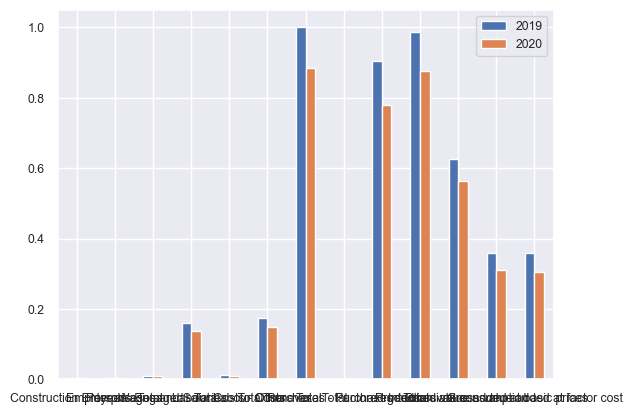

In [554]:
#plot a bar plot for each 'Statistic Label' 'VALUE' comparing 2019 and 2020
#reference: https://stackoverflow.com/questions/33458566/how-to-plot-a-bar-chart-using-matplotlib-using-a-dictionary
# list of values for each label for 2019 where UNIT = Number

nineteen = df.loc[df['Year'] == 2019, 'VALUE'].to_list()
twenty = df.loc[df['Year'] == 2020, 'VALUE'].to_list()
index_ = df.loc[df['Year'] == 2019, 'Statistic Label'].to_list()
# list of values for each label for 2020
print(nineteen)
print(twenty)
print(index_)
import matplotlib.pyplot as plt
import numpy as np
df = pd.DataFrame({'2019': nineteen, '2020': twenty}, index=index_)
ax = df.plot.bar(rot=0)
plt.show()

In [555]:
#BAA15 - Persons Engaged 


url = "https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%5D,%22dimension%22:%7B%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22CSV%22,%22version%22:%221.0%22%7D,%22matrix%22:%22BAA15%22%7D,%22version%22:%222.0%22%7D%7D"

response = requests.get(url)

data = response.json().get('result')

#ead the data into a dataframe where data in csv format
# Convert the CSV string to a Pandas DataFrame
personsEngaged_df = pd.read_csv(io.StringIO(data))
print(personsEngaged_df.head(5))
print(personsEngaged_df.info()) 

print(personsEngaged_df.tail(5))


            Statistic Label  Year Persons Engaged    UNIT    VALUE
0  Construction Enterprises  2019           0 - 9  Number  56935.0
1  Construction Enterprises  2019         10 - 49  Number   2007.0
2  Construction Enterprises  2019        50 - 249  Number    208.0
3  Construction Enterprises  2019    250 and over  Number     25.0
4  Construction Enterprises  2020           0 - 9  Number  60553.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  352 non-null    object 
 1   Year             352 non-null    int64  
 2   Persons Engaged  352 non-null    object 
 3   UNIT             352 non-null    object 
 4   VALUE            104 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.9+ KB
None
                      Statistic Label  Year Persons Engaged           UNIT   
347  Gross value added at 

# 2.0

## 2.1

In [556]:
# reference https://ec.europa.eu/eurostat/databrowser/view/EI_ISBU_Q__custom_6200052/settings_1/table?lang=en
df = pd.read_csv('Data/ei_isbu_q__custom_6200052_linear.csv', header=0,  parse_dates=True)

In [557]:
df.head(5)

DATAFLOW        LAST UPDATE freq   unit s_adj   indic nace_r2   
0  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F  \
1  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F   
2  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F   
3  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F   
4  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI       F   

  geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
0  AL     2010-Q1       90.4      NaN  
1  AL     2010-Q2       88.9      NaN  
2  AL     2010-Q3       87.0      NaN  
3  AL     2010-Q4       79.2      NaN  
4  AL     2011-Q1       81.2      NaN

## 2.2

In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     7252 non-null   object 
 1   LAST UPDATE  7252 non-null   object 
 2   freq         7252 non-null   object 
 3   unit         7252 non-null   object 
 4   s_adj        7252 non-null   object 
 5   indic        7252 non-null   object 
 6   nace_r2      7252 non-null   object 
 7   geo          7252 non-null   object 
 8   TIME_PERIOD  7252 non-null   object 
 9   OBS_VALUE    7248 non-null   float64
 10  OBS_FLAG     634 non-null    object 
dtypes: float64(1), object(10)
memory usage: 623.3+ KB


In [559]:
#show rows where 'OBS_VALUE' is null
print(df[df['OBS_VALUE'].isnull()])

                  DATAFLOW        LAST UPDATE freq   unit s_adj   indic   
156   ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI  \
1356  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-EPI   
3120  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-HWI   
6737  ESTAT:EI_ISBU_Q(1.0)  13/05/23 11:00:00    Q  I2015   NSA  IS-WSI   

     nace_r2 geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
156        F  BE     2022-Q4        NaN        c  
1356       F  NL     2022-Q4        NaN        c  
3120       F  NL     2022-Q4        NaN        c  
6737       F  NL     2022-Q4        NaN        c  


In [560]:
#remove rows where 'OBS_VALUE' is null
df = df[df['OBS_VALUE'].notna()]

In [561]:
#drop rows where TIME_PERIOD contains '2023'
df = df[~df['TIME_PERIOD'].str.contains('2023')]

## 2.3

In [562]:
#loop through columns and print unique values
for col in df.columns:
    print(col, ": ", df[col].unique())
    


DATAFLOW :  ['ESTAT:EI_ISBU_Q(1.0)']
LAST UPDATE :  ['13/05/23 11:00:00']
freq :  ['Q']
unit :  ['I2015']
s_adj :  ['NSA']
indic :  ['IS-EPI' 'IS-HWI' 'IS-IP' 'IS-WSI']
nace_r2 :  ['F']
geo :  ['AL' 'AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR'
 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'ME' 'MK' 'MT' 'NL' 'NO' 'PL'
 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'TR' 'UK' 'BA']
TIME_PERIOD :  ['2010-Q1' '2010-Q2' '2010-Q3' '2010-Q4' '2011-Q1' '2011-Q2' '2011-Q3'
 '2011-Q4' '2012-Q1' '2012-Q2' '2012-Q3' '2012-Q4' '2013-Q1' '2013-Q2'
 '2013-Q3' '2013-Q4' '2014-Q1' '2014-Q2' '2014-Q3' '2014-Q4' '2015-Q1'
 '2015-Q2' '2015-Q3' '2015-Q4' '2016-Q1' '2016-Q2' '2016-Q3' '2016-Q4'
 '2017-Q1' '2017-Q2' '2017-Q3' '2017-Q4' '2018-Q1' '2018-Q2' '2018-Q3'
 '2018-Q4' '2019-Q1' '2019-Q2' '2019-Q3' '2019-Q4' '2020-Q1' '2020-Q2'
 '2020-Q3' '2020-Q4' '2021-Q1' '2021-Q2' '2021-Q3' '2021-Q4' '2022-Q1'
 '2022-Q2' '2022-Q3' '2022-Q4']
OBS_VALUE :  [ 90.4  88.9  87.  ... 343.7 464.7 513.9]
OBS_FLAG :  [nan 'p

In [563]:
#drop rows where geo = 'UK'
df = df[df['geo'].str.contains('UK') == False]

In [564]:
#count the number of entries for each unique value on 'OBS_FLAG'
print(df['OBS_FLAG'].value_counts())

OBS_FLAG
p    295
e    278
Name: count, dtype: int64


## 2.4

In [565]:
#drop column 'LAST UPDATE'
df = df.drop(columns=['LAST UPDATE'])
#drop column 'FREQ'
df = df.drop(columns=['freq'])
#drop column 'DATAFLOW'
df = df.drop(columns=['DATAFLOW'])
#drop column 's_adj'
df = df.drop(columns=['s_adj'])
#drop column 'unit'
df = df.drop(columns=['unit'])
#drop column 'nace_r2'
df = df.drop(columns=['nace_r2'])
#drop column 'OBS_FLAG'
df = df.drop(columns=['OBS_FLAG'])

df.head(5)



indic geo TIME_PERIOD  OBS_VALUE
0  IS-EPI  AL     2010-Q1       90.4
1  IS-EPI  AL     2010-Q2       88.9
2  IS-EPI  AL     2010-Q3       87.0
3  IS-EPI  AL     2010-Q4       79.2
4  IS-EPI  AL     2011-Q1       81.2

In [566]:
#drop everything after and including '-Q' in 'TIME_PERIOD'
df['TIME_PERIOD'] = df['TIME_PERIOD'].str.split('-Q').str[0]
df_quarterly = df.copy()
df.head(20)

indic geo TIME_PERIOD  OBS_VALUE
0   IS-EPI  AL        2010       90.4
1   IS-EPI  AL        2010       88.9
2   IS-EPI  AL        2010       87.0
3   IS-EPI  AL        2010       79.2
4   IS-EPI  AL        2011       81.2
5   IS-EPI  AL        2011       79.6
6   IS-EPI  AL        2011       77.9
7   IS-EPI  AL        2011       76.3
8   IS-EPI  AL        2012       87.3
9   IS-EPI  AL        2012       85.3
10  IS-EPI  AL        2012       79.0
11  IS-EPI  AL        2012       73.6
12  IS-EPI  AL        2013       80.2
13  IS-EPI  AL        2013       75.7
14  IS-EPI  AL        2013       74.8
15  IS-EPI  AL        2013       75.5
16  IS-EPI  AL        2014       87.6
17  IS-EPI  AL        2014       87.7
18  IS-EPI  AL        2014       89.9
19  IS-EPI  AL        2014       93.8

In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7044 entries, 0 to 7208
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   indic        7044 non-null   object 
 1   geo          7044 non-null   object 
 2   TIME_PERIOD  7044 non-null   object 
 3   OBS_VALUE    7044 non-null   float64
dtypes: float64(1), object(3)
memory usage: 275.2+ KB


In [568]:
#sum the values for each 'TIME_PERIOD', 'indic' and 'geo'
df = df.groupby(['TIME_PERIOD', 'indic', 'geo']).sum().reset_index()
df.head(20)

TIME_PERIOD   indic geo  OBS_VALUE
0         2010  IS-EPI  AL      345.5
1         2010  IS-EPI  AT      396.2
2         2010  IS-EPI  BE      399.1
3         2010  IS-EPI  BG      497.4
4         2010  IS-EPI  CH      379.7
5         2010  IS-EPI  CY      700.9
6         2010  IS-EPI  CZ      433.0
7         2010  IS-EPI  DE      373.7
8         2010  IS-EPI  DK      422.0
9         2010  IS-EPI  EE      343.3
10        2010  IS-EPI  EL      581.1
11        2010  IS-EPI  ES      615.2
12        2010  IS-EPI  FI      404.4
13        2010  IS-EPI  FR      439.0
14        2010  IS-EPI  HR      507.7
15        2010  IS-EPI  HU      419.1
16        2010  IS-EPI  IE      356.3
17        2010  IS-EPI  IS      347.8
18        2010  IS-EPI  IT      519.8
19        2010  IS-EPI  LT      344.2

### 2.4.1

In [569]:
#create a column for each unique value in 'indic'setting its row value =  to 'OBS_VALUE'
df = pd.get_dummies(df, columns=['indic'])
df_quarterly = pd.get_dummies(df_quarterly, columns=['indic'])
#remove 'indic_' in column names
df.columns = df.columns.str.replace('indic_', '')
df_quarterly.columns = df_quarterly.columns.str.replace('indic_', '')
#if the value in 'IS-EPI' or 'IS-HWI' or 'IS-IP' or 'IS-WSI' = 1, set its value to 'OBS_VALUE'
df['IS-EPI'] = df['IS-EPI'] * df['OBS_VALUE']
df_quarterly['IS-EPI'] = df_quarterly['IS-EPI'] * df_quarterly['OBS_VALUE']
df['IS-HWI'] = df['IS-HWI'] * df['OBS_VALUE']
df_quarterly['IS-HWI'] = df_quarterly['IS-HWI'] * df_quarterly['OBS_VALUE']
df['IS-IP'] = df['IS-IP'] * df['OBS_VALUE']
df_quarterly['IS-IP'] = df_quarterly['IS-IP'] * df_quarterly['OBS_VALUE']
df['IS-WSI'] = df['IS-WSI'] * df['OBS_VALUE']
df_quarterly['IS-WSI'] = df_quarterly['IS-WSI'] * df_quarterly['OBS_VALUE']



df.head(5)

TIME_PERIOD geo  OBS_VALUE  IS-EPI  IS-HWI  IS-IP  IS-WSI
0        2010  AL      345.5   345.5     0.0    0.0     0.0
1        2010  AT      396.2   396.2     0.0    0.0     0.0
2        2010  BE      399.1   399.1     0.0    0.0     0.0
3        2010  BG      497.4   497.4     0.0    0.0     0.0
4        2010  CH      379.7   379.7     0.0    0.0     0.0

In [570]:
#drop the OBS_VALUE column

df = df.drop(columns=['OBS_VALUE'])
df_quarterly = df_quarterly.drop(columns=['OBS_VALUE'])
df.head(5)


TIME_PERIOD geo  IS-EPI  IS-HWI  IS-IP  IS-WSI
0        2010  AL   345.5     0.0    0.0     0.0
1        2010  AT   396.2     0.0    0.0     0.0
2        2010  BE   399.1     0.0    0.0     0.0
3        2010  BG   497.4     0.0    0.0     0.0
4        2010  CH   379.7     0.0    0.0     0.0

In [571]:
#make individual datasets for each 'indic' column


df_IS_EPI = df[df['IS-EPI'] != 0]
df_IS_EPI_quarterly = df_quarterly[df_quarterly['IS-EPI'] != 0]
df_IS_HWI = df[df['IS-HWI'] != 0]
df_IS_HWI_quarterly = df_quarterly[df_quarterly['IS-HWI'] != 0]
df_IS_IP = df[df['IS-IP'] != 0]
df_IS_IP_quarterly = df_quarterly[df_quarterly['IS-IP'] != 0]
df_IS_WSI = df[df['IS-WSI'] != 0]
df_IS_WSI_quarterly = df_quarterly[df_quarterly['IS-WSI'] != 0]


In [572]:
df_IS_IP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 68 to 1728
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIME_PERIOD  449 non-null    object 
 1   geo          449 non-null    object 
 2   IS-EPI       449 non-null    float64
 3   IS-HWI       449 non-null    float64
 4   IS-IP        449 non-null    float64
 5   IS-WSI       449 non-null    float64
dtypes: float64(4), object(2)
memory usage: 24.6+ KB


In [573]:
# join all dataframes together on 'TIME_PERIOD' and 'geo', drop row if missing values
df = pd.merge(df_IS_EPI, df_IS_HWI, on=['geo', 'TIME_PERIOD'], how='inner')
df_quarterly = pd.merge(df_IS_EPI_quarterly, df_IS_HWI_quarterly, on=['geo', 'TIME_PERIOD'], how='inner')
df.dropna(inplace=True)
df_quarterly.dropna(inplace=True)
# if value in 'IS-HWI_y' not = 0 set 'IS-HWI_x' = 'IS-HWI_y'
df.loc[df['IS-HWI_y'] != 0, 'IS-HWI_x'] = df['IS-HWI_y']
df_quarterly.loc[df_quarterly['IS-HWI_y'] != 0, 'IS-HWI_x'] = df_quarterly['IS-HWI_y']
df = df.iloc[:, :4]
df_quarterly = df_quarterly.iloc[:, :4]
# join all dataframes together on 'TIME_PERIOD' and 'geo', drop row if missing values
df = pd.merge(df, df_IS_IP, on=['geo', 'TIME_PERIOD'], how='inner')
df_quarterly = pd.merge(df_quarterly, df_IS_IP_quarterly, on=['geo', 'TIME_PERIOD'], how='inner')
df.dropna(inplace=True)
df_quarterly.dropna(inplace=True)
# if value in 'IS-HWI_y' not = 0 set 'IS-HWI_x' = 'IS-HWI_y'
df.drop(['IS-EPI', 'IS-HWI', 'IS-WSI'], axis=1, inplace=True)
df_quarterly.drop(['IS-EPI', 'IS-HWI', 'IS-WSI'], axis=1, inplace=True)
# join all dataframes together on 'TIME_PERIOD' and 'geo', drop row if missing values
df = pd.merge(df, df_IS_WSI, on=['geo', 'TIME_PERIOD'], how='inner')
df_quarterly = pd.merge(df_quarterly, df_IS_WSI_quarterly, on=['geo', 'TIME_PERIOD'], how='inner')
df.dropna(inplace=True)
df_quarterly.dropna(inplace=True)
df.drop(['IS-EPI', 'IS-HWI', 'IS-IP_y'], axis=1, inplace=True)
df_quarterly.drop(['IS-EPI', 'IS-HWI', 'IS-IP_y'], axis=1, inplace=True)
# if colimn name has _x, remove _x
df.columns = df.columns.str.replace('_x', '')
df_quarterly.columns = df_quarterly.columns.str.replace('_x', '')

df.head()
df_quarterly.head()


geo TIME_PERIOD  IS-EPI  IS-HWI  IS-IP  IS-WSI
0  AT        2010    87.3    81.8   68.0    69.0
1  AT        2010    87.3    81.8   68.0    90.8
2  AT        2010    87.3    81.8   68.0    89.9
3  AT        2010    87.3    81.8   68.0   103.9
4  AT        2010    87.3    81.8   97.8    69.0

In [574]:
df_IS_IP

TIME_PERIOD geo  IS-EPI  IS-HWI  IS-IP  IS-WSI
68          2010  AL     0.0     0.0  418.7     0.0
69          2010  AT     0.0     0.0  391.9     0.0
70          2010  BA     0.0     0.0  430.1     0.0
71          2010  BE     0.0     0.0  406.5     0.0
72          2010  BG     0.0     0.0  403.8     0.0
...          ...  ..     ...     ...    ...     ...
1724        2022  RO     0.0     0.0  575.3     0.0
1725        2022  RS     0.0     0.0  726.6     0.0
1726        2022  SE     0.0     0.0  495.9     0.0
1727        2022  SI     0.0     0.0  633.8     0.0
1728        2022  SK     0.0     0.0  334.4     0.0

[449 rows x 6 columns]

In [575]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIME_PERIOD  410 non-null    object 
 1   geo          410 non-null    object 
 2   IS-EPI       410 non-null    float64
 3   IS-HWI       410 non-null    float64
 4   IS-IP        410 non-null    float64
 5   IS-WSI       410 non-null    float64
dtypes: float64(4), object(2)
memory usage: 19.3+ KB


### 2.4.2

In [576]:
# check for values = 0 in any column
df.isin([0]).any()


TIME_PERIOD    False
geo            False
IS-EPI         False
IS-HWI         False
IS-IP          False
IS-WSI         False
dtype: bool

In [577]:
#the last value for each country in each indicator
df_lastValueEntry = df.groupby('geo').tail(1)
df_lastValueEntry
#df_lastValueEntry.to_excel('df_lastValueEntry.xlsx')


TIME_PERIOD geo  IS-EPI  IS-HWI  IS-IP  IS-WSI
223        2016  TR   417.5   411.8  412.2   513.2
379        2022  AT   488.7   483.9  524.4   581.9
380        2022  BE   348.1   435.5  399.5   514.1
381        2022  BG   360.9   334.9  358.8   607.0
382        2022  CY   674.2   751.1  747.7   782.3
383        2022  CZ   386.9   359.5  432.0   584.5
384        2022  DE   446.0   431.1  452.9   542.4
385        2022  DK   507.0   503.5  533.1   626.3
386        2022  EE   484.5   468.9  612.6   719.1
387        2022  EL   308.2   478.0  338.4   429.7
388        2022  ES   492.2   428.0  313.8   468.9
389        2022  FI   424.6   416.4  479.6   548.0
390        2022  FR   460.3   459.7  415.2   523.1
391        2022  HR   517.1   578.5  566.7   544.1
392        2022  HU   608.0   601.2  641.4  1269.8
393        2022  IE   678.9   698.1  520.2   870.6
394        2022  IT   465.3   527.9  543.8   571.9
395        2022  LT   404.3   392.2  524.7   694.1
396        2022  LU   426.2   423.4  430.7   512.4
397        2022  LV   401.0   413.0  424.2   649.0
398        2022  ME   670.8   661.5  946.5   497.5
399        2022  MK   324.2   323.2  238.6   652.1
400        2022  MT   384.4   382.4  667.3   549.7
401        2022  NL   351.9   335.2  536.5   407.5
402        2022  NO   479.7   468.5  498.5   611.9
403        2022  PL   446.9   447.0  508.7   710.5
404        2022  PT   422.6   411.8  418.5   479.7
405        2022  RO   517.8   504.4  575.3  1330.7
406        2022  RS   557.8   420.5  726.6   625.2
407        2022  SE   500.6   492.1  495.9   589.3
408        2022  SI   542.3   376.5  633.8   539.6
409        2022  SK   420.5   393.8  334.4   524.0

## 2.5

In [578]:
#drop rows for geo = 'TR'
df = df[df['geo'].str.contains('TR') == False]
df_quarterly = df_quarterly[df_quarterly['geo'].str.contains('TR') == False]
df_IS_EPI = df_IS_EPI[df_IS_EPI['geo'].str.contains('TR') == False]  
df_IS_EPI_quarterly = df_IS_EPI_quarterly[df_IS_EPI_quarterly['geo'].str.contains('TR') == False]  
df_IS_HWI = df_IS_HWI[df_IS_HWI['geo'].str.contains('TR') == False]
df_IS_HWI_quarterly = df_IS_HWI_quarterly[df_IS_HWI_quarterly['geo'].str.contains('TR') == False]
df_IS_IP = df_IS_IP[df_IS_IP['geo'].str.contains('TR') == False]
df_IS_IP_quarterly = df_IS_IP_quarterly[df_IS_IP_quarterly['geo'].str.contains('TR') == False]
df_IS_WSI = df_IS_WSI[df_IS_WSI['geo'].str.contains('TR') == False]
df_IS_WSI_quarterly = df_IS_WSI_quarterly[df_IS_WSI_quarterly['geo'].str.contains('TR') == False]

In [579]:
#reset df_ index to 'TIME_PERIOD'
df = df.set_index('TIME_PERIOD')
df_quarterly = df_quarterly.set_index('TIME_PERIOD')
df.head()

geo  IS-EPI  IS-HWI  IS-IP  IS-WSI
TIME_PERIOD                                   
2010         AT   396.2   397.8  391.9   353.6
2010         BE   399.1   361.6  406.5   360.3
2010         BG   497.4   454.6  403.8   369.0
2010         CY   700.9   780.6  853.8   764.7
2010         CZ   433.0   438.5  432.1   455.2

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 2010 to 2022
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     403 non-null    object 
 1   IS-EPI  403 non-null    float64
 2   IS-HWI  403 non-null    float64
 3   IS-IP   403 non-null    float64
 4   IS-WSI  403 non-null    float64
dtypes: float64(4), object(1)
memory usage: 18.9+ KB


# 5.0

In [581]:
import plotly.graph_objects as go
import plotly.express as px
from PIL import Image

def cht(df, var, title):
    colors = {"IE": "red"}
    #grey color scheme for all other countries
    
    color_discrete_map = {
        c: colors.get(c,'grey')
        for c in df['geo'].unique()}

    
    fig = px.bar(df.sort_values('TIME_PERIOD'), y="geo", x=var, color='geo', orientation='h', text='geo', range_x=[0, df[var].max()], height=1000,color_discrete_map=color_discrete_map,
                 animation_frame="TIME_PERIOD", animation_group="geo")
    fig.update_layout(title_text=title)
    # Set text color
    fig.update_traces(textfont_color='white', showlegend=False)

    
    # Set animation speed
    # Set duration in milliseconds
    fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 500
    # Set transition duration in milliseconds
    fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

    fig.show()
    


In [582]:
indicators = ['IS-EPI', 'IS-HWI', 'IS-IP', 'IS-WSI']
dfs = [df_IS_EPI, df_IS_HWI, df_IS_IP, df_IS_WSI]
dfs_quarterly = [df_IS_EPI_quarterly, df_IS_HWI_quarterly, df_IS_IP_quarterly, df_IS_WSI_quarterly]
for i in range(len(indicators)):
    cht(dfs[i], indicators[i], indicators[i])


##  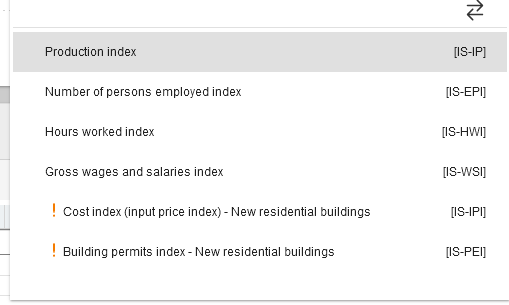

## 5.1

In [583]:
import pycountry

# Define a function to get the country name from an ISO-3166-1 alpha-2 code
def get_country_name(iso_2):
    try:
        return pycountry.countries.get(alpha_2=iso_2).name
    except:
        return None

# Add a new column to the dataframe with the country names
df['country_name'] = df['geo'].apply(get_country_name)
df_quarterly['country_name'] = df_quarterly['geo'].apply(get_country_name)
df_IS_EPI['country_name'] = df_IS_EPI['geo'].apply(get_country_name)
df_IS_EPI_quarterly['country_name'] = df_IS_EPI_quarterly['geo'].apply(get_country_name)
df_IS_HWI['country_name'] = df_IS_HWI['geo'].apply(get_country_name)
df_IS_HWI_quarterly['country_name'] = df_IS_HWI_quarterly['geo'].apply(get_country_name)
df_IS_IP['country_name'] = df_IS_IP['geo'].apply(get_country_name)
df_IS_IP_quarterly['country_name'] = df_IS_IP_quarterly['geo'].apply(get_country_name)
df_IS_WSI['country_name'] = df_IS_WSI['geo'].apply(get_country_name)
df_IS_WSI_quarterly['country_name'] = df_IS_WSI_quarterly['geo'].apply(get_country_name)


df.head(5)


geo  IS-EPI  IS-HWI  IS-IP  IS-WSI country_name
TIME_PERIOD                                                
2010         AT   396.2   397.8  391.9   353.6      Austria
2010         BE   399.1   361.6  406.5   360.3      Belgium
2010         BG   497.4   454.6  403.8   369.0     Bulgaria
2010         CY   700.9   780.6  853.8   764.7       Cyprus
2010         CZ   433.0   438.5  432.1   455.2      Czechia

## 5.2

In [584]:
#show rows with missing country names
df[df['country_name'].isnull()]

geo  IS-EPI  IS-HWI  IS-IP  IS-WSI country_name
TIME_PERIOD                                                
2010         EL   581.1   553.6  937.8   721.6         None
2011         EL   481.2   456.7  552.2   588.2         None
2012         EL   451.0   419.4  366.9   475.2         None
2013         EL   452.2   409.4  337.1   421.1         None
2014         EL   530.3   413.4  390.1   458.0         None
2015         EL   400.0   400.0  400.1   400.1         None
2016         EL   474.5   477.4  425.9   458.5         None
2017         EL   497.4   574.0  346.5   505.1         None
2018         EL   524.8   619.8  298.7   502.0         None
2019         EL   421.7   558.8  280.5   422.7         None
2020         EL   380.5   548.5  253.9   438.6         None
2021         EL   318.8   498.1  271.9   405.9         None
2022         EL   308.2   478.0  338.4   429.7         None

## 5.3

In [585]:
#'check if 'Greece' is in country_name column'
'Greece' in df['country_name'].unique()

False

## 5.4

In [586]:
#where 'geo' = 'EL' set 'country_name' = 'Greece'
df.loc[df['geo'] == 'EL', 'country_name'] = 'Greece'
df_quarterly.loc[df_quarterly['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_EPI.loc[df_IS_EPI['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_EPI_quarterly.loc[df_IS_EPI_quarterly['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_HWI.loc[df_IS_HWI['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_HWI_quarterly.loc[df_IS_HWI_quarterly['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_IP.loc[df_IS_IP['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_IP_quarterly.loc[df_IS_IP_quarterly['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_WSI.loc[df_IS_WSI['geo'] == 'EL', 'country_name'] = 'Greece'
df_IS_WSI_quarterly.loc[df_IS_WSI_quarterly['geo'] == 'EL', 'country_name'] = 'Greece'


In [587]:
#drop columns from df_IS_EPI equal to IS-HWI, IS-IP, IS-WSI
df_IS_EPI.drop(['IS-HWI', 'IS-IP', 'IS-WSI'], axis=1, inplace=True)
df_IS_EPI_quarterly.drop(['IS-HWI', 'IS-IP', 'IS-WSI'], axis=1, inplace=True)
#drop columns from df_IS_HWI equal to IS-EPI, IS-IP, IS-WSI
df_IS_HWI.drop(['IS-EPI', 'IS-IP', 'IS-WSI'], axis=1, inplace=True)
df_IS_HWI_quarterly.drop(['IS-EPI', 'IS-IP', 'IS-WSI'], axis=1, inplace=True)
#drop columns from df_IS_IP equal to IS-EPI, IS-HWI, IS-WSI
df_IS_IP.drop(['IS-EPI', 'IS-HWI', 'IS-WSI'], axis=1, inplace=True)
df_IS_IP_quarterly.drop(['IS-EPI', 'IS-HWI', 'IS-WSI'], axis=1, inplace=True)
#drop columns from df_IS_WSI equal to IS-EPI, IS-HWI, IS-IP
df_IS_WSI.drop(['IS-EPI', 'IS-HWI', 'IS-IP'], axis=1, inplace=True)
df_IS_WSI_quarterly.drop(['IS-EPI', 'IS-HWI', 'IS-IP'], axis=1, inplace=True)


# 6.0

In [588]:
import plotly.graph_objects as go
import plotly.express as px
from PIL import Image

def cht2(df, var, title):
    colors = {"Ireland": "red"}
    #grey color scheme for all other countries
    
    color_discrete_map = {
        c: colors.get(c,'grey')
        for c in df['country_name'].unique()}

    
    fig = px.bar(df.sort_values('TIME_PERIOD'), y="country_name", x=var, color='country_name', orientation='h', text='country_name', range_x=[0, df[var].max()+10], height=1000,color_discrete_map=color_discrete_map,
                 animation_frame="TIME_PERIOD", animation_group="country_name")
    fig.update_layout(title_text=title)
    # Set text color
    fig.update_traces(textfont_color='white', showlegend=False)

    
    # Set animation speed
    # Set duration in milliseconds
    fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 500
    # Set transition duration in milliseconds
    fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

    fig.show()
    


## 6.1

In [589]:
indicators = ['IS-EPI', 'IS-HWI', 'IS-IP', 'IS-WSI']
dfs = [df_IS_EPI, df_IS_HWI, df_IS_IP, df_IS_WSI]
for i in range(len(indicators)):
    cht2(dfs[i], indicators[i], indicators[i])


# 7.0 Statistics


## 7.1

In [590]:
# create a new dataframe with the last value for each country in each indicator
df_describe = df.describe()
df_describe.to_excel('df_describe.xlsx')

In [591]:
df_describe

IS-EPI      IS-HWI        IS-IP       IS-WSI
count  403.000000  403.000000   403.000000   403.000000
mean   430.078908  424.594045   438.289826   459.351117
std     65.550361   77.157763   120.634933   130.845661
min    247.600000  216.000000   148.000000   219.700000
25%    399.000000  389.250000   375.000000   390.250000
50%    414.600000  408.800000   409.100000   422.600000
75%    454.450000  439.550000   472.350000   500.850000
max    706.700000  780.600000  1101.700000  1330.700000

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 2010 to 2022
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   geo           403 non-null    object 
 1   IS-EPI        403 non-null    float64
 2   IS-HWI        403 non-null    float64
 3   IS-IP         403 non-null    float64
 4   IS-WSI        403 non-null    float64
 5   country_name  403 non-null    object 
dtypes: float64(4), object(2)
memory usage: 22.0+ KB


## 7.2

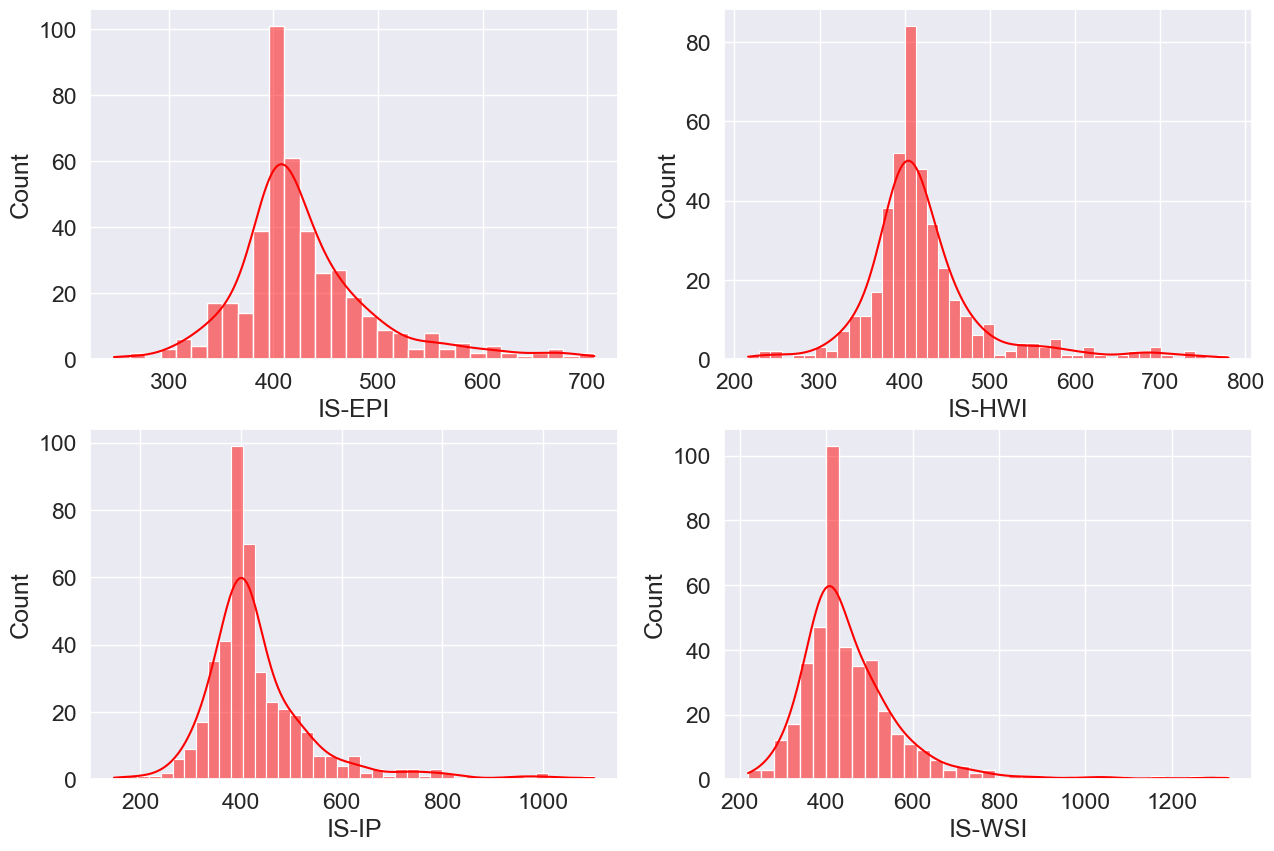

In [593]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(ax=axes[0, 0], data=df_IS_EPI, x="IS-EPI", kde=True, color="red")
sns.histplot(ax=axes[0, 1], data=df_IS_HWI, x="IS-HWI", kde=True, color="red")
sns.histplot(ax=axes[1, 0], data=df_IS_IP, x="IS-IP", kde=True, color="red")
sns.histplot(ax=axes[1, 1], data=df_IS_WSI, x="IS-WSI", kde=True, color="red")

plt.show()



<AxesSubplot:xlabel='IS-WSI'>

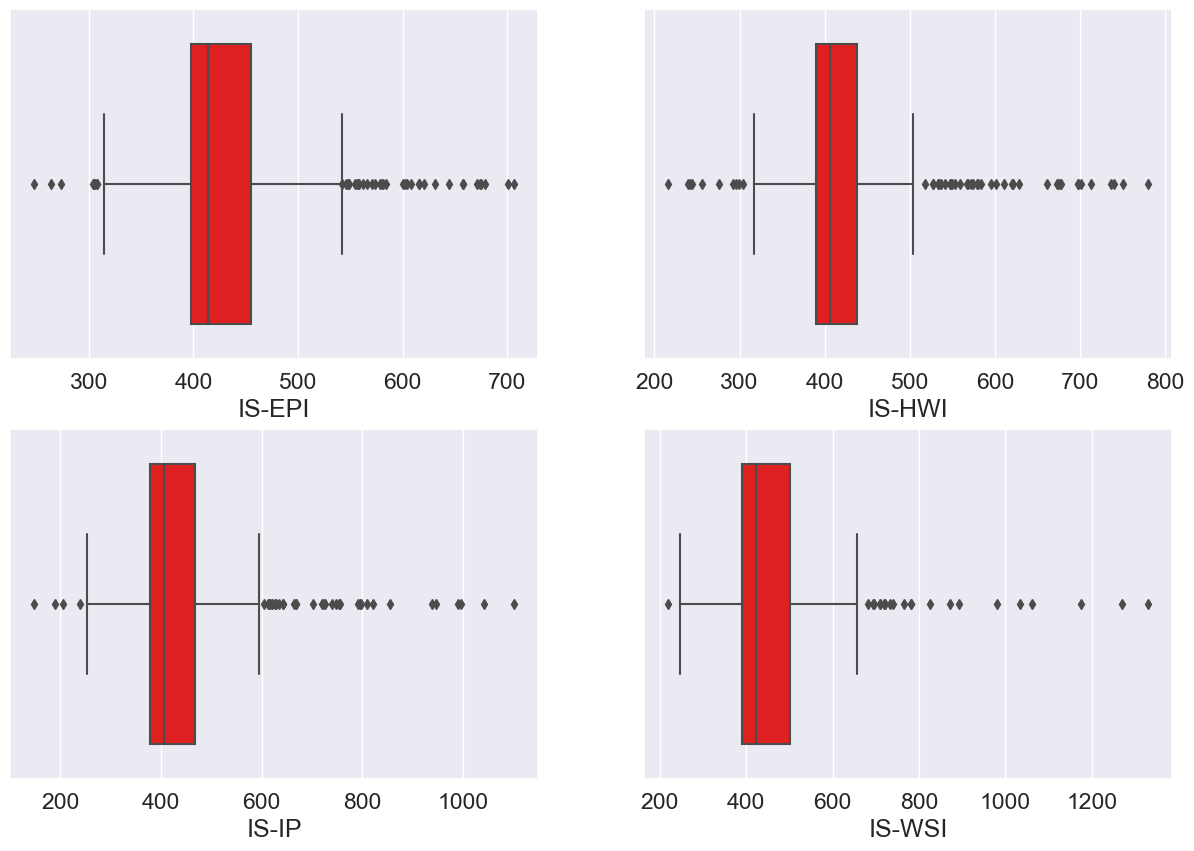

In [594]:
#visulize any outliers in each indicator
import seaborn as sns
import matplotlib.pyplot as plt
#increase the size of the font
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0, 0], data=df_IS_EPI, x="IS-EPI", color="red")
sns.boxplot(ax=axes[0, 1], data=df_IS_HWI, x="IS-HWI", color="red")
sns.boxplot(ax=axes[1, 0], data=df_IS_IP, x="IS-IP", color="red")
sns.boxplot(ax=axes[1, 1], data=df_IS_WSI, x="IS-WSI", color="red")


In [595]:
# Create a function for checking normality of a feature
#reference: https://www.analyticsvidhya.com/blog/2021/05/how-to-transform-features-into-normal-gaussian-distribution/
#function to return plots for the feature
import scipy.stats as stats
import pylab
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature]).set_title('Distribution of '+feature)
    plt.subplot(1,2,2)
    #reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
    stats.probplot(data[feature],plot=pylab)
    plt.show()

### 7.2.1

In [596]:
#calculate the z score for each indicator
from scipy import stats
# Calculate z-scores for each data point
def outliers(data):
    z_scores = np.abs(stats.zscore(data))

    # Define a threshold for identifying outliers
    threshold = 3  # Adjust this threshold as needed

    # Identify outliers
    outliers = np.where(z_scores > threshold)[0]

    # Count the number of outliers
    num_outliers = len(outliers)


    return num_outliers
    

print("Number of outliers:",outliers(df['IS-EPI']),'IS-EPI',' Number of values: ',df['IS-EPI'].count())
print("Number of outliers:",outliers(df['IS-HWI']),'IS-HWI',' Number of values: ',df['IS-HWI'].count())
print("Number of outliers:",outliers(df['IS-IP']),'IS-IP',' Number of values: ',df['IS-IP'].count())
print("Number of outliers:",outliers(df['IS-WSI']),'IS-WSI',' Number of values: ',df['IS-WSI'].count())

#percentage of outliers in each indicator
print('IS-EPI',outliers(df['IS-EPI'])/df['IS-EPI'].count()*100,'%')
print('IS-HWI',outliers(df['IS-HWI'])/df['IS-HWI'].count()*100,'%')
print('IS-IP',outliers(df['IS-IP'])/df['IS-IP'].count()*100,'%')
print('IS-WSI',outliers(df['IS-WSI'])/df['IS-WSI'].count()*100,'%')

Number of outliers: 9 IS-EPI  Number of values:  403
Number of outliers: 13 IS-HWI  Number of values:  403
Number of outliers: 9 IS-IP  Number of values:  403
Number of outliers: 8 IS-WSI  Number of values:  403
IS-EPI 2.2332506203473943 %
IS-HWI 3.225806451612903 %
IS-IP 2.2332506203473943 %
IS-WSI 1.9851116625310175 %


## 7.3


In [597]:
#anderson-darling test for normality
#Checking if the indicators accross the countries are normally distributed
from scipy.stats import anderson
normallyDistributedIndicators = []
NOTnormallyDistributedIndicators = []
def aDarling(df, var):
    result = anderson(df[var])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
            #append the indicator to the list of normally distributed indicators if not already there
            if var not in normallyDistributedIndicators:
                normallyDistributedIndicators.append(var)
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            if var not in NOTnormallyDistributedIndicators:
                NOTnormallyDistributedIndicators.append(var)

        
for i in range(len(indicators)):
    aDarling(dfs[i], indicators[i])

print('Mormally distributed: ', normallyDistributedIndicators)
print('Not Normally Distributed: ', NOTnormallyDistributedIndicators)

Statistic: 14.911
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistic: 24.411
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.909, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistic: 24.769
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistic: 18.721
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look nor

In [598]:
#perform a shapiro-wilk test for normality on each indicator
from scipy.stats import shapiro
def sWilk(df, var):
    stat, p = shapiro(df[var])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(var,' Sample looks Gaussian (fail to reject H0)')
    else:
        print(var,' Sample does not look Gaussian (reject H0)')
        
for i in range(len(indicators)):
    sWilk(dfs[i], indicators[i])
  

Statistics=0.896, p=0.000
IS-EPI  Sample does not look Gaussian (reject H0)
Statistics=0.821, p=0.000
IS-HWI  Sample does not look Gaussian (reject H0)
Statistics=0.800, p=0.000
IS-IP  Sample does not look Gaussian (reject H0)
Statistics=0.785, p=0.000
IS-WSI  Sample does not look Gaussian (reject H0)


In [599]:
#perform a chi-square test for normality on each indicator
from scipy.stats import normaltest
def normalityTest(df, var):
    stat, p = normaltest(df[var])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(var,' Sample looks Gaussian (fail to reject H0)')
    else:
        print(var,' Sample does not look Gaussian (reject H0)')
        
for i in range(len(indicators)):
    normalityTest(dfs[i], indicators[i])
    
    

Statistics=116.014, p=0.000
IS-EPI  Sample does not look Gaussian (reject H0)
Statistics=169.565, p=0.000
IS-HWI  Sample does not look Gaussian (reject H0)
Statistics=231.697, p=0.000
IS-IP  Sample does not look Gaussian (reject H0)
Statistics=273.755, p=0.000
IS-WSI  Sample does not look Gaussian (reject H0)


### 7.3.1

In [600]:
#checking which county's Production Index indicator are normally distributed
from scipy import stats
# Perform Shapiro-Wilk test
finalList = []
normallyDistributed_IP = []
def wilk(df, var):
    for country in df['geo'].unique():
        
        statistic, p_value = stats.shapiro(df[df['geo']==country][var])

        # Print the test result
        alpha = 0.05  # Set the significance level
        if p_value >= alpha:
            #print("Data is normally distributed (fail to reject H0)")

            normallyDistributed_IP.append(country)

for i in range(len(indicators)):
    wilk(dfs[i], indicators[i])

    #print(normallyDistributed_IP)
    finalList.append(normallyDistributed_IP)
    normallyDistributed_IP = []
allFour = []   
# if a value in in all 4 lists of finalList, the add to allFour
for i in range(len(finalList[0])):
    if finalList[0][i] in finalList[1] and finalList[0][i] in finalList[2] and finalList[0][i] in finalList[3]:
        allFour.append(finalList[0][i])
        
print(f'All countries where indicators are all normally distributed {allFour}')

#df_normallyDistributed_IP is equal to df where the geo is in allFour
df_normallyDistributed_IP = df[df['geo'].isin(allFour)]
df_normallyDistributed_IP.head()




All countries where indicators are all normally distributed ['BE', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'HR', 'IE', 'LT', 'LU', 'LV', 'MK', 'MT', 'NL', 'NO']


geo  IS-EPI  IS-HWI  IS-IP  IS-WSI country_name
TIME_PERIOD                                                
2010         BE   399.1   361.6  406.5   360.3      Belgium
2010         CY   700.9   780.6  853.8   764.7       Cyprus
2010         CZ   433.0   438.5  432.1   455.2      Czechia
2010         DE   373.7   366.3  372.4   307.0      Germany
2010         DK   422.0   416.0  354.8   387.7      Denmark

## 7.4

## 7.5

In [601]:
#calculate the confidence interval for each indicator
from scipy import stats
import numpy as np
# Calculate the confidence interval for each data point
def confidence_interval(data):
    confidence = 0.95
    n = len(data)
    m = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    start = m - h
    end = m + h
    return start, end



print('IS-IP',confidence_interval(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='DK']['IS-IP']))





IS-IP (389.580453032915, 459.03493158246965)


In [602]:
#confirm calculation based on class lecture demo
import scipy.stats as st
st.t.interval(alpha=0.95, df=len(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='DK']['IS-IP'])-1, loc=np.mean(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='DK']['IS-IP']), scale=st.sem(df_normallyDistributed_IP[df_normallyDistributed_IP['geo']=='DK']['IS-IP']))

(389.580453032915, 459.03493158246965)

### 7.5.1

In [603]:
df_IS_IP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 68 to 1728
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIME_PERIOD   442 non-null    object 
 1   geo           442 non-null    object 
 2   IS-IP         442 non-null    float64
 3   country_name  442 non-null    object 
dtypes: float64(1), object(3)
memory usage: 17.3+ KB


In [604]:
df_IS_IP = df_IS_IP.reset_index(drop=True)
df_IS_WSI = df_IS_WSI.reset_index(drop=True)
df_IS_HWI = df_IS_HWI.reset_index(drop=True)
df_IS_EPI = df_IS_EPI.reset_index(drop=True)
df_IS_IP_quarterly = df_IS_IP_quarterly.reset_index(drop=True)
df_IS_WSI_quarterly = df_IS_WSI_quarterly.reset_index(drop=True)
df_IS_HWI_quarterly = df_IS_HWI_quarterly.reset_index(drop=True)
df_IS_EPI_quarterly = df_IS_EPI_quarterly.reset_index(drop=True)


In [605]:
#Calculate the proportion of Construction Index values for each country relative to the total Construction Index values across all European countries for each year
#https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby
df_IS_IP['Proportion'] = df_IS_IP.groupby('TIME_PERIOD')['IS-IP'].apply(lambda x:  x / float(x.sum())).reset_index(drop=True)
df_IS_IP_quarterly['Proportion'] = df_IS_IP_quarterly.groupby('TIME_PERIOD')['IS-IP'].apply(lambda x:  x / float(x.sum())).reset_index(drop=True)
df_IS_WSI['Proportion'] = df_IS_WSI.groupby('TIME_PERIOD')['IS-WSI'].apply(lambda x:  x / float(x.sum())).reset_index(drop=True)
df_IS_WSI_quarterly['Proportion'] = df_IS_WSI_quarterly.groupby('TIME_PERIOD')['IS-WSI'].apply(lambda x:  x / float(x.sum())).reset_index(drop=True)
df_IS_HWI['Proportion'] = df_IS_HWI.groupby('TIME_PERIOD')['IS-HWI'].apply(lambda x:  x / float(x.sum())).reset_index(drop=True)
df_IS_HWI_quarterly['Proportion'] = df_IS_HWI_quarterly.groupby('TIME_PERIOD')['IS-HWI'].apply(lambda x:  x / float(x.sum())).reset_index(drop=True)
df_IS_EPI['Proportion'] = df_IS_EPI.groupby('TIME_PERIOD')['IS-EPI'].apply(lambda x:  x / float(x.sum())).reset_index(drop=True)
df_IS_EPI_quarterly['Proportion'] = df_IS_EPI_quarterly.groupby('TIME_PERIOD')['IS-EPI'].apply(lambda x:  x / float(x.sum())).reset_index(drop=True)

In [606]:
df_IS_IP_quarterly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   geo           1768 non-null   object 
 1   TIME_PERIOD   1768 non-null   object 
 2   IS-IP         1768 non-null   float64
 3   country_name  1768 non-null   object 
 4   Proportion    1768 non-null   float64
dtypes: float64(2), object(3)
memory usage: 69.2+ KB


In [607]:
df_IS_IP.tail(20)

TIME_PERIOD geo  IS-IP     country_name  Proportion
422        2022  FR  415.2           France    0.023900
423        2022  HR  566.7          Croatia    0.032621
424        2022  HU  641.4          Hungary    0.036921
425        2022  IE  520.2          Ireland    0.029944
426        2022  IT  543.8            Italy    0.031303
427        2022  LT  524.7        Lithuania    0.030203
428        2022  LU  430.7       Luxembourg    0.024792
429        2022  LV  424.2           Latvia    0.024418
430        2022  ME  946.5       Montenegro    0.054483
431        2022  MK  238.6  North Macedonia    0.013735
432        2022  MT  667.3            Malta    0.038412
433        2022  NL  536.5      Netherlands    0.030882
434        2022  NO  498.5           Norway    0.028695
435        2022  PL  508.7           Poland    0.029282
436        2022  PT  418.5         Portugal    0.024090
437        2022  RO  575.3          Romania    0.033116
438        2022  RS  726.6           Serbia    0.041825
439        2022  SE  495.9           Sweden    0.028545
440        2022  SI  633.8         Slovenia    0.036483
441        2022  SK  334.4         Slovakia    0.019249

In [608]:
#IS-IP for AL for 2010
df_IS_IP[(df_IS_IP['geo']=='AL') & (df_IS_IP['TIME_PERIOD']=='2010')]['Proportion']

0    0.028711
Name: Proportion, dtype: float64

In [609]:
df_IS_IP[(df_IS_IP['geo']=='AL') & (df_IS_IP['TIME_PERIOD']=='2010')]['IS-IP'].sum()

418.7

In [610]:
#total IS-IP for 2010
df_IS_IP[df_IS_IP['TIME_PERIOD']=='2010']['IS-IP'].sum()

14583.1

<AxesSubplot:title={'center':'Ireland'}, xlabel='TIME_PERIOD', ylabel='Proportion'>

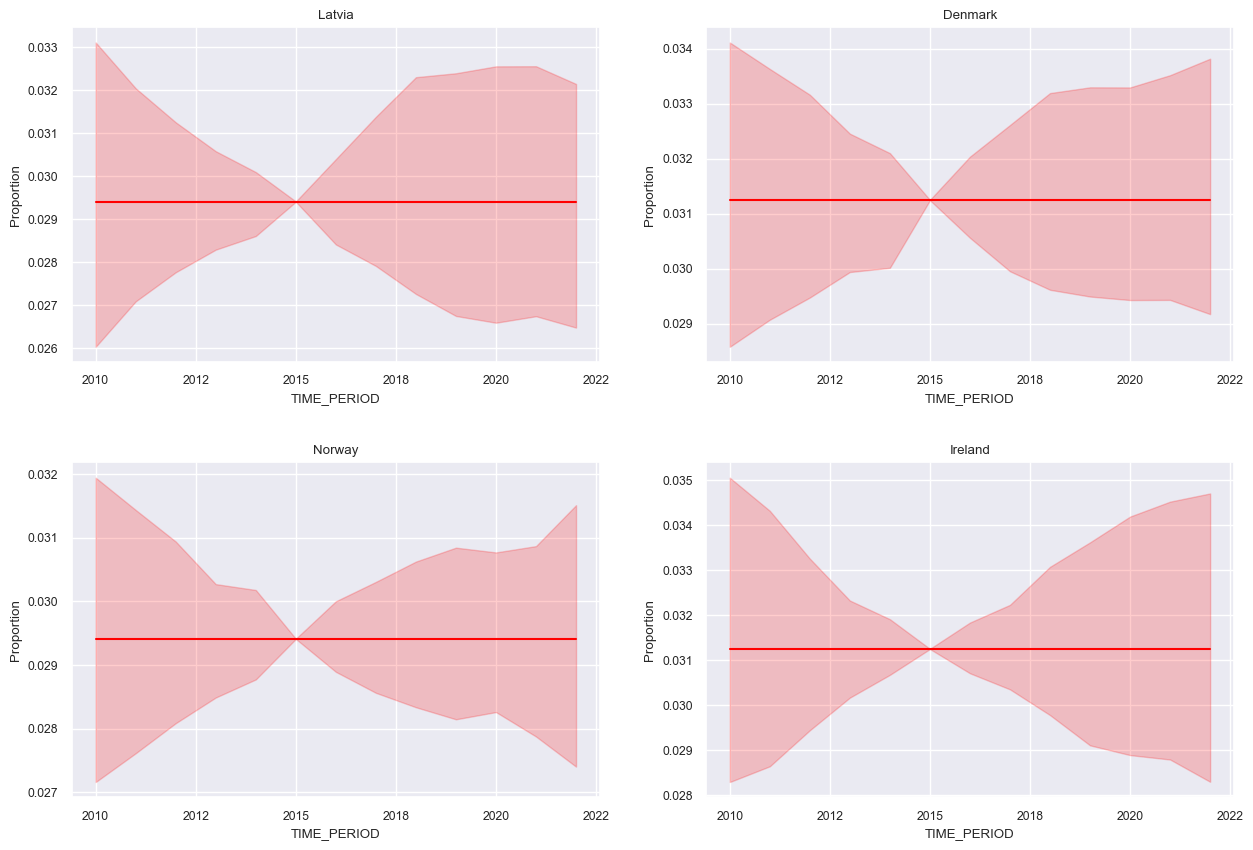

In [611]:
#visu;ize the confidence interval for each indicator

#visulize the confidence interval for each indicator
import seaborn as sns
import matplotlib.pyplot as plt

#decresae the size of the font
sns.set(font_scale=.8)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
#turn sns.lineplot x axis ticks 90 degrees

#set title for each plot
axes[0, 0].set_title('Latvia')
axes[0, 1].set_title('Denmark')
axes[1, 0].set_title('Norway')
axes[1, 1].set_title('Ireland')

#increase space between row 0 and row 1
fig.subplots_adjust(hspace=.3)
#display every 4th tick
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(6))
axes[0, 1].xaxis.set_major_locator(plt.MaxNLocator(6))
axes[1, 0].xaxis.set_major_locator(plt.MaxNLocator(6))
axes[1, 1].xaxis.set_major_locator(plt.MaxNLocator(6))

sns.lineplot(ax=axes[0, 0], data=df_IS_IP, x="TIME_PERIOD", y='Proportion', color="red")
sns.lineplot(ax=axes[1, 0], data=df_IS_EPI, x="TIME_PERIOD", y='Proportion', color="red")
sns.lineplot(ax=axes[0, 1], data=df_IS_HWI, x="TIME_PERIOD", y='Proportion', color="red")
sns.lineplot(ax=axes[1, 1], data=df_IS_WSI, x="TIME_PERIOD", y='Proportion', color="red")






### 7.5.2

In [612]:
#display sum of Proportion by year for all countries
df_IS_IP.groupby('TIME_PERIOD')['Proportion'].sum()

TIME_PERIOD
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
Name: Proportion, dtype: float64

In [613]:
#display sum of Proportion by year for all countries
df_IS_IP_quarterly.groupby('TIME_PERIOD')['Proportion'].sum()

TIME_PERIOD
2010    1.016827
2011    1.024842
2012    0.987492
2013    1.017799
2014    0.950625
2015    1.020065
2016    1.047754
2017    0.956125
2018    1.034173
2019    0.962235
2020    0.976703
2021    1.061882
2022    0.943477
Name: Proportion, dtype: float64

### 7.5.3

In [614]:
df_IS_IP_quarterly = df_IS_IP_quarterly.reset_index(drop=True)
df_IS_WSI_quarterly = df_IS_WSI_quarterly.reset_index(drop=True)
df_IS_HWI_quarterly = df_IS_HWI_quarterly.reset_index(drop=True)
df_IS_EPI_quarterly = df_IS_EPI_quarterly.reset_index(drop=True)

In [615]:
import numpy as np
from scipy.stats import t

# Assuming you have a DataFrame named 'df_IS_IP' containing the necessary data
# and the columns 'geo', 'Proportion', and 'Year'

# Step 1: Filter the data for Ireland ('IE')
df_IE = df_IS_IP_quarterly[df_IS_IP_quarterly['geo'] == 'IE']

# Step 2: Calculate the average proportion across all countries in allfour for each year

average_proportions = df_IS_IP_quarterly[df_IS_IP_quarterly['geo'].isin(df_normallyDistributed_IP['geo'].unique())].groupby('TIME_PERIOD')['Proportion'].mean()
average_proportions
# Step 3: Calculate the sample size for Ireland for each year
sample_sizes = df_IE.groupby('TIME_PERIOD').size().values


# Step 4: Calculate the mean and standard deviation of the proportions for Ireland for each year
means = df_IE.groupby('TIME_PERIOD')['Proportion'].mean().values
stds = df_IE.groupby('TIME_PERIOD')['Proportion'].std(ddof=1).values

# Step 5: Calculate the t-value for the desired confidence level
confidence_level = 0.95
t_value = t.ppf((1 + confidence_level) / 2, df=sample_sizes - 1)

# Step 6: Calculate the margin of error
margin_of_error = t_value * stds / np.sqrt(sample_sizes)

# Step 7: Calculate the confidence intervals
lower_bounds = means - margin_of_error
upper_bounds = means + margin_of_error

# Step 8: Check if the lower bound is above the average proportion
#This will provide you with the confidence intervals where the lower bound is above the average proportion, indicating that Ireland has an above-average level of proportion with the specified confidence level.
above_average = lower_bounds > average_proportions

#create a table with the results
df_CIresults = pd.DataFrame({ 'Lower Bound': lower_bounds, 'European Average Proportion': average_proportions,'Upper Bound': upper_bounds,'Above Average': above_average,   'Ireland': means})
# Print the confidence intervals for each year
for year, lower, upper, is_above_average, average, proportion in zip(df_IE['TIME_PERIOD'].unique(), lower_bounds, upper_bounds, above_average, average_proportions, means):
    #format values to 4 decimal places
    lower = "{:.4f}".format(lower)
    upper = "{:.4f}".format(upper)
    average = "{:.4f}".format(average)
    proportion = "{:.4f}".format(proportion)

    #print results
    print(f"Year {year}; Confidence Interval = ({lower}, {upper}); Average EU: {average} Ireland: {proportion};  Ireland above avarage: {is_above_average};")

df_CIresults.reset_index(drop=False, inplace=True)
df_CIresults
#df_CIresults.to_excel('Data/Production Index proportion averages.xlsx', index=False)

Year 2010; Confidence Interval = (0.0062, 0.0098); Average EU: 0.0080 Ireland: 0.0080;  Ireland above avarage: False;
Year 2011; Confidence Interval = (0.0065, 0.0080); Average EU: 0.0073 Ireland: 0.0072;  Ireland above avarage: False;
Year 2012; Confidence Interval = (0.0035, 0.0097); Average EU: 0.0069 Ireland: 0.0066;  Ireland above avarage: False;
Year 2013; Confidence Interval = (0.0069, 0.0081); Average EU: 0.0077 Ireland: 0.0075;  Ireland above avarage: False;
Year 2014; Confidence Interval = (0.0031, 0.0090); Average EU: 0.0072 Ireland: 0.0061;  Ireland above avarage: False;
Year 2015; Confidence Interval = (0.0065, 0.0127); Average EU: 0.0076 Ireland: 0.0096;  Ireland above avarage: False;
Year 2016; Confidence Interval = (0.0058, 0.0098); Average EU: 0.0071 Ireland: 0.0078;  Ireland above avarage: False;
Year 2017; Confidence Interval = (0.0077, 0.0080); Average EU: 0.0071 Ireland: 0.0079;  Ireland above avarage: True;
Year 2018; Confidence Interval = (0.0072, 0.0086); Averag

TIME_PERIOD  Lower Bound  European Average Proportion  Upper Bound   
0         2010     0.006196                     0.007994     0.009814  \
1         2011     0.006504                     0.007305     0.007965   
2         2012     0.003484                     0.006878     0.009728   
3         2013     0.006928                     0.007743     0.008127   
4         2014     0.003136                     0.007229     0.009027   
5         2015     0.006469                     0.007629     0.012693   
6         2016     0.005797                     0.007083     0.009824   
7         2017     0.007747                     0.007051     0.008041   
8         2018     0.007203                     0.007695     0.008621   
9         2019     0.006631                     0.007079     0.008523   
10        2020     0.003480                     0.007031     0.008971   
11        2021     0.006808                     0.007162     0.007046   
12        2022     0.003753                     0.007279     0.010195   

    Above Average   Ireland  
0           False  0.008005  
1           False  0.007235  
2           False  0.006606  
3           False  0.007528  
4           False  0.006082  
5           False  0.009581  
6           False  0.007810  
7            True  0.007894  
8           False  0.007912  
9           False  0.007577  
10          False  0.006226  
11          False  0.006927  
12          False  0.006974

In [616]:
#use Wilson Score to calculate the confidence interval for 'IE' country proportion of Construction Index values relative to the total Construction Index values across all European countries for each year
#https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy
import numpy as np
from scipy.stats import norm



def wilson_score(data):
    confidence = 0.95
    n = len(data)
    m = np.mean(data)

    if n == 0 or n == 1 or m == 0 or m == 1:
        # Handle zero variance case
        start, end = 0.0, 1.0
    else:
        z = norm.ppf(1 - (1 - confidence) / 2)
        denominator = 1 + z**2/n
        h = z * np.sqrt((m * (1 - m)) / n)
        start = m - h
        end = m + h

    return start, end



# Step 3: Calculate the confidence interval using the Wilson score method for each year
confidence_intervals = df_IS_IP.groupby('TIME_PERIOD')['Proportion'].apply(wilson_score)
test = df_IS_IP.groupby('TIME_PERIOD')['Proportion']
print(test)
# Print the confidence intervals for each year
for year, interval in confidence_intervals.items():
    print(f"Year {year}: Confidence Interval = {interval}")



Year 2010: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2011: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2012: Confidence Interval = (-0.027380172816874316, 0.08620370222863902)
Year 2013: Confidence Interval = (-0.027380172816874316, 0.08620370222863902)
Year 2014: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2015: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2016: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2017: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2018: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2019: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2020: Confidence Interval = (-0.027380172816874316, 0.08620370222863902)
Year 2021: Confidence Interval = (-0.02738017281687432, 0.08620370222863902)
Year 2022: Confidence Interval = (-0.02738017281687432, 0.086203702228639

In [617]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(count=56, nobs=100, method='wilson')

(0.4622810465167698, 0.6532797336983921)

## 7.6

Select the countries for comparison:

In [649]:
comparison_countries = allFour
#drop 'IE' country from the list of comparison countries

df_comparison = df[df['geo'].isin(comparison_countries)].copy()

df_comparison

geo  IS-EPI  IS-HWI  IS-IP  IS-WSI     country_name
TIME_PERIOD                                                    
2010         BE   399.1   361.6  406.5   360.3          Belgium
2010         CY   700.9   780.6  853.8   764.7           Cyprus
2010         CZ   433.0   438.5  432.1   455.2          Czechia
2010         DE   373.7   366.3  372.4   307.0          Germany
2010         DK   422.0   416.0  354.8   387.7          Denmark
...          ..     ...     ...    ...     ...              ...
2022         LV   401.0   413.0  424.2   649.0           Latvia
2022         MK   324.2   323.2  238.6   652.1  North Macedonia
2022         MT   384.4   382.4  667.3   549.7            Malta
2022         NL   351.9   335.2  536.5   407.5      Netherlands
2022         NO   479.7   468.5  498.5   611.9           Norway

[221 rows x 6 columns]

In [650]:
df_comparison['geo'].unique()

array(['BE', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'HR', 'IE', 'LT',
       'LU', 'LV', 'MK', 'MT', 'NL', 'NO'], dtype=object)

Parametric Techniques:

T-Test: Conduct independent t-tests to compare Ireland with each comparison country for different variables (IS-IP, IS-EPI, IS-HWI, IS-WSI). This can help determine if there are significant differences in the means of these variables between Ireland and each country.

In [676]:
from scipy.stats import ttest_ind
#Null Hypothesis (H0): The mean indicator value of IE is equal to the mean indicator value of the other country.
#Alternative Hypothesis (H1): The mean indicator valueof Ireland is greater thanthe mean indicator value  of the other country.
#Conclusion: if p-value < 0.05, reject H0 and accept H1 that the indicator value for ireland is greater than mean indicator valie. If p-value > 0.05, accept H0 and reject H1.


for variable in ['IS-IP', 'IS-EPI', 'IS-HWI', 'IS-WSI']:
    ireland_data = df_comparison[df_comparison['geo'] == 'IE'][variable]
    for country in comparison_countries[1:]:
        country_data = df_comparison[df_comparison['geo'] == country][variable]
        t_statistic, p_value = ttest_ind(ireland_data, country_data, alternative='greater')
        if p_value < 0.05:
            print(f"(H1) There mean {variable} for Ireland is greater than the mean {variable} for {country} (p-value = {p_value}). t-statistic = {t_statistic}")
            
        else:
            print(f"(H0) The mean {variable} for Ireland is equal to the mean {variable} for {country} (p-value = {p_value}). t-statistic = {t_statistic}")
#create a table with country  mapped to df['country_name'] as a column, indicator as a column

df_resultsH1 = pd.DataFrame(columns=comparison_countries + ['variable'])
#set index to 'IS-IP', 'IS-EPI', 'IS-HWI', 'IS-WSI'

                          

for variable in ['IS-IP', 'IS-EPI', 'IS-HWI', 'IS-WSI']:
    ireland_data = df_comparison[df_comparison['geo'] == 'IE'][variable]
    for country in comparison_countries:
        country_data = df_comparison[df_comparison['geo'] == country][variable]
        t_statistic, p_value = ttest_ind(ireland_data, country_data, alternative='greater')
        #add True to country column if p_value < 0.05 and False if p_value >= 0.05. add variable to variable column
        df_resultsH1.loc[variable, country] = p_value < 0.05  
        df_resultsH1.loc[variable, 'variable'] = variable
df_resultsH1.head(30)


#drop column 'Ireland' from the table
df_resultsH1.drop(columns=['IE'], inplace=True)
#drop columns with all True values
df_resultsH1 = df_resultsH1.loc[:, (df_resultsH1 != True).any(axis=0)]
df_resultsH1.head(30)
#df_resultsH1.to_excel('Data/ttest_H1.xlsx')



            


(H0) The mean IS-IP for Ireland is equal to the mean IS-IP for CY (p-value = 0.9998186890270974). t-statistic = -4.147617632433366
(H0) The mean IS-IP for Ireland is equal to the mean IS-IP for CZ (p-value = 0.09439139267802496). t-statistic = 1.3526250296982354
(H0) The mean IS-IP for Ireland is equal to the mean IS-IP for DE (p-value = 0.24522846457179615). t-statistic = 0.7003272290072186
(H0) The mean IS-IP for Ireland is equal to the mean IS-IP for DK (p-value = 0.2927458988382828). t-statistic = 0.5528314210081561
(H0) The mean IS-IP for Ireland is equal to the mean IS-IP for EE (p-value = 0.8168166940439421). t-statistic = -0.9207059929987732
(H1) There mean IS-IP for Ireland is greater than the mean IS-IP for ES (p-value = 0.01723371914596783). t-statistic = 2.2420405822550693
(H0) The mean IS-IP for Ireland is equal to the mean IS-IP for FI (p-value = 0.24135892954613797). t-statistic = 0.713005798569482
(H0) The mean IS-IP for Ireland is equal to the mean IS-IP for HR (p-valu

Analysis of Variance (ANOVA): Conduct one-way ANOVA to compare the means of the variables across multiple groups (Ireland and the comparison countries) for each variable. This can help determine if there are significant differences among the means of the groups.

In [652]:
#Null Hypothesis (H0): The mean indicator value is the same across all countries.
#Alternative Hypothesis (H1): The mean indicator value is different across at least one pair of countries
#Conclusion: If the p-value is less than the significance level, we reject the null hypothesis and conclude that there is a significant difference in the mean indicator value among the countries.

from scipy.stats import f_oneway

for variable in ['IS-IP', 'IS-EPI', 'IS-HWI', 'IS-WSI']:
    data = [df_comparison[df_comparison['geo'] == country][variable].values for country in comparison_countries]
    f_statistic, p_value = f_oneway(*data)

    if p_value < 0.05:
        print(f"(H1) The mean {variable} is different across at least one pair of countries (p-value = {p_value}). F-statistic = {f_statistic}")
    else:
        print(f"(H0) The mean {variable} is the same across all countries (p-value = {p_value}). F-statistic = {f_statistic}")


(H1) The mean IS-IP is different across at least one pair of countries (p-value = 9.011728403721326e-21). F-statistic = 11.385660733726194
(H1) The mean IS-EPI is different across at least one pair of countries (p-value = 1.0322608937273421e-16). F-statistic = 9.08816835854322
(H1) The mean IS-HWI is different across at least one pair of countries (p-value = 3.1274672929135763e-17). F-statistic = 9.371702201452022
(H1) The mean IS-WSI is different across at least one pair of countries (p-value = 0.002200320176456787). F-statistic = 2.435011964259549


Non-Parametric Techniques:

Wilcoxon Rank-Sum Test (Mann-Whitney U Test): Conduct rank-sum tests to compare Ireland with each comparison country for different variables. This can help determine if there are significant differences in the distributions of these variables between Ireland and each country.

Kruskal-Wallis Test: This test is a non-parametric equivalent of the one-way ANOVA and can be used to compare the distributions of multiple groups when the assumptions of ANOVA are violated (e.g., non-normality, unequal variances). It can be used to compare the construction index data among Ireland and the comparison countries.

In [653]:
#Null Hypothesis (H0): The distribution of indicator value is the same between Ireland and the other country.
#Alternative Hypothesis (H1): The distribution of indicator value is different between Ireland and the other country.

from scipy.stats import ranksums


for variable in ['IS-IP', 'IS-EPI', 'IS-HWI', 'IS-WSI']:
    ireland_data = df_comparison[df_comparison['geo'] == 'IE'][variable]
    for country in comparison_countries[1:]:
        country_data = df_comparison[df_comparison['geo'] == country][variable]
        statistic, p_value = ranksums(ireland_data, country_data)
        if p_value < 0.05:
            print(f"(H1) The distribution of {variable} is different between Ireland and {country} (p-value = {p_value}). Statistic = {statistic}") 
        else:
            print(f"(H0) The distribution of {variable} is the same between Ireland and {country} (p-value = {p_value}). Statistic = {statistic}")






(H1) The distribution of IS-IP is different between Ireland and CY (p-value = 0.0026997960632601866). Statistic = -3.0
(H0) The distribution of IS-IP is the same between Ireland and CZ (p-value = 0.4266880826197468). Statistic = 0.7948717948717948
(H0) The distribution of IS-IP is the same between Ireland and DE (p-value = 0.7005223941038486). Statistic = 0.38461538461538464
(H0) The distribution of IS-IP is the same between Ireland and DK (p-value = 0.6261311406690924). Statistic = 0.48717948717948717
(H0) The distribution of IS-IP is the same between Ireland and EE (p-value = 0.31731050786291415). Statistic = -1.0
(H0) The distribution of IS-IP is the same between Ireland and ES (p-value = 0.11779348392039132). Statistic = 1.564102564102564
(H0) The distribution of IS-IP is the same between Ireland and FI (p-value = 0.6261311406690924). Statistic = 0.48717948717948717
(H0) The distribution of IS-IP is the same between Ireland and HR (p-value = 0.27021650650797135). Statistic = -1.102

In [654]:
from scipy.stats import kruskal
for variable in ['IS-IP', 'IS-EPI', 'IS-HWI', 'IS-WSI']:
    data = [df_comparison[df_comparison['geo'] == country][variable].values for country in comparison_countries]
    h_statistic, p_value = kruskal(*data)
    print(f"Kruskal-Wallis Test for '{variable}': H-statistic = {h_statistic}, p-value = {p_value}")

Kruskal-Wallis Test for 'IS-IP': H-statistic = 62.75366795829216, p-value = 1.7866905805295499e-07
Kruskal-Wallis Test for 'IS-EPI': H-statistic = 71.21490713340239, p-value = 6.107721581421149e-09
Kruskal-Wallis Test for 'IS-HWI': H-statistic = 66.42852890162828, p-value = 4.1765898252011266e-08
Kruskal-Wallis Test for 'IS-WSI': H-statistic = 21.21509374704932, p-value = 0.17039000299183998


# 8.0 Machine Learning

## Question: Can we predict the proportion of production index for a European country in a given year based on the other construction indices (IS-EPI, IS-HWI, IS-WSI) and country information?

## 8.1 Random forest regression

In [655]:
df.head(30)

geo  IS-EPI  IS-HWI  IS-IP  IS-WSI     country_name
TIME_PERIOD                                                    
2010         AT   396.2   397.8  391.9   353.6          Austria
2010         BE   399.1   361.6  406.5   360.3          Belgium
2010         BG   497.4   454.6  403.8   369.0         Bulgaria
2010         CY   700.9   780.6  853.8   764.7           Cyprus
2010         CZ   433.0   438.5  432.1   455.2          Czechia
2010         DE   373.7   366.3  372.4   307.0          Germany
2010         DK   422.0   416.0  354.8   387.7          Denmark
2010         EE   343.3   327.6  285.3   247.6          Estonia
2010         EL   581.1   553.6  937.8   721.6           Greece
2010         ES   615.2   381.7  416.3   386.9            Spain
2010         FI   404.4   415.2  364.4   333.5          Finland
2010         FR   439.0   439.2  449.0   394.5           France
2010         HR   507.7   317.5  594.1   411.2          Croatia
2010         HU   419.1   430.5  366.9   349.3          Hungary
2010         IE   356.3   330.1  378.9   342.5          Ireland
2010         IT   519.8   540.9  588.9   501.6            Italy
2010         LT   344.2   329.3  280.7   246.7        Lithuania
2010         LU   425.7   423.7  418.4   371.5       Luxembourg
2010         LV   308.1   299.8  263.3   219.7           Latvia
2010         ME   345.2   367.7  353.0   398.7       Montenegro
2010         MK   247.6   242.2  148.0   324.0  North Macedonia
2010         MT   426.4   408.3  294.1   382.8            Malta
2010         NL   502.4   483.5  414.9   470.9      Netherlands
2010         NO   338.8   339.9  319.8   299.3           Norway
2010         PL   449.7   455.8  389.9   398.1           Poland
2010         PT   706.7   713.2  739.6   710.8         Portugal
2010         RO   371.5   370.7  375.0   309.4          Romania
2010         RS   489.0   385.0  338.1   319.6           Serbia
2010         SE   338.9   341.9  349.6   290.8           Sweden
2010         SI   578.4   394.8  663.3   413.6         Slovenia

In [656]:
#data_df = df join df_IS_IP on geo, TIME_PERIOD and IS-IP
data_df = pd.merge(df, df_IS_IP, on=['geo', 'TIME_PERIOD', 'IS-IP'])
data_df.head()

geo TIME_PERIOD  IS-EPI  IS-HWI  IS-IP  IS-WSI country_name_x   
0  AT        2010   396.2   397.8  391.9   353.6        Austria  \
1  BE        2010   399.1   361.6  406.5   360.3        Belgium   
2  BG        2010   497.4   454.6  403.8   369.0       Bulgaria   
3  CY        2010   700.9   780.6  853.8   764.7         Cyprus   
4  CZ        2010   433.0   438.5  432.1   455.2        Czechia   

  country_name_y  Proportion  
0        Austria    0.026874  
1        Belgium    0.027875  
2       Bulgaria    0.027690  
3         Cyprus    0.058547  
4        Czechia    0.029630

In [657]:
data_df.info()
#rename country_name_x to country_name
data_df.rename(columns={'country_name_x': 'country_name'}, inplace=True)
#drop country_name_y
data_df.drop(columns=['country_name_y'], inplace=True)
#change TIME_PERIOD to datetime year
data_df['TIME_PERIOD'] = pd.to_datetime(data_df['TIME_PERIOD'], format='%Y')
data_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   geo             403 non-null    object 
 1   TIME_PERIOD     403 non-null    object 
 2   IS-EPI          403 non-null    float64
 3   IS-HWI          403 non-null    float64
 4   IS-IP           403 non-null    float64
 5   IS-WSI          403 non-null    float64
 6   country_name_x  403 non-null    object 
 7   country_name_y  403 non-null    object 
 8   Proportion      403 non-null    float64
dtypes: float64(5), object(4)
memory usage: 28.5+ KB


geo TIME_PERIOD  IS-EPI  IS-HWI  IS-IP  IS-WSI country_name  Proportion
0  AT  2010-01-01   396.2   397.8  391.9   353.6      Austria    0.026874
1  BE  2010-01-01   399.1   361.6  406.5   360.3      Belgium    0.027875
2  BG  2010-01-01   497.4   454.6  403.8   369.0     Bulgaria    0.027690
3  CY  2010-01-01   700.9   780.6  853.8   764.7       Cyprus    0.058547
4  CZ  2010-01-01   433.0   438.5  432.1   455.2      Czechia    0.029630

In [658]:
#export data to csv for ML
data_df.to_csv('Data/MLdata_df.csv', index=False)

In [659]:
# Map 'geo' column to numeric values and add as new column
data_df['numeric_geo'] = pd.factorize(data_df['geo'])[0]

data_df.head()


geo TIME_PERIOD  IS-EPI  IS-HWI  IS-IP  IS-WSI country_name  Proportion   
0  AT  2010-01-01   396.2   397.8  391.9   353.6      Austria    0.026874  \
1  BE  2010-01-01   399.1   361.6  406.5   360.3      Belgium    0.027875   
2  BG  2010-01-01   497.4   454.6  403.8   369.0     Bulgaria    0.027690   
3  CY  2010-01-01   700.9   780.6  853.8   764.7       Cyprus    0.058547   
4  CZ  2010-01-01   433.0   438.5  432.1   455.2      Czechia    0.029630   

   numeric_geo  
0            0  
1            1  
2            2  
3            3  
4            4

In [660]:
#check for nan values data_df
data_df.isna().sum()

geo             0
TIME_PERIOD     0
IS-EPI          0
IS-HWI          0
IS-IP           0
IS-WSI          0
country_name    0
Proportion      0
numeric_geo     0
dtype: int64

In [661]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load the dataset (assuming you already have it in a DataFrame named df_IS_IP)
# Select the relevant features and target variable
features = ['IS-EPI', 'IS-HWI', 'IS-WSI', 'numeric_geo']
target = 'Proportion'

data = data_df[features + [target]].copy()

# Split the data into training and testing sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its performance
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print the best hyperparameters and the mean squared error
print("Best Hyperparameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)



Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 1.596805157911654e-05


In [662]:
# Make a prediction using the trained model
prediction = best_rf_model.predict([[396.2, 397.8, 353.6, 0]])
print("Prediction:", prediction)

Prediction: [0.02885632]


In [663]:
import pandas as pd
import plotly.express as px

# Assuming you have the actual values in y_test and the predicted values in y_pred

# Create a DataFrame to hold the actual and predicted values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create an interactive scatter plot with a trendline
fig = px.scatter(df_results, x='Actual', y='Predicted', trendline='ols')

# Customize the plot layout
fig.update_layout(
    title="Actual vs Predicted Values for IS-IP using Random Forest Regressor",

    
    xaxis_title="Actual",
    yaxis_title="Predicted"
)




# Show the plot
fig.show()


## 8.2 Support Vector Regression (SVR) 

In [664]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [665]:

X = data_df[features]
y = data_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [666]:
svr = SVR()
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5]
}


In [667]:
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5)
grid_search_svr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5]})

In [668]:
best_svr_model = grid_search_svr.best_estimator_
y_pred_svr = best_svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)


In [669]:
print("SVR - Mean Squared Error:", mse_svr)


SVR - Mean Squared Error: 2.1702048381318296e-05


In [670]:
#visualize results fro SVR
df_results_svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr})

fig_svr = px.scatter(df_results_svr, x='Actual', y='Predicted', trendline='ols')

fig_svr.update_layout(
    title="Actual vs Predicted Values for IS-IP using Support Vector Regressor",
    
    xaxis_title="Actual",
    yaxis_title="Predicted"
)
#update data point to color red
fig_svr.update_traces(marker_color='red', selector=dict(type='scatter', mode='markers'))
#update trendline to color red
fig_svr.update_traces(line_color='red', selector=dict(type='scatter', mode='lines'))


fig_svr.show()


In [671]:
#compare results from SVR and RF regressors in one plot fig and fig_svr
#add fig_svr to fig points and trendline in red
fig.add_trace(fig_svr.data[0])
fig.add_trace(fig_svr.data[1])
#update title
fig.update_layout(title="Actual vs Predicted Values for IS-IP using Random Forest Regressor and Support Vector Regressor")
#add legend
#update legend names
fig.update_traces(name='Random Forest Regressor', selector=dict(type='scatter', mode='markers'))


fig.show()

In [672]:
import plotly.graph_objects as go

# Assuming you have the predicted values for both SVR and RF in separate variables

# Create a trace for SVR results
trace_svr = go.Scatter(
    x=df_results_svr['Actual'],  # X-axis values (e.g., actual values)
    y=df_results_svr['Predicted'],  # Y-axis values (e.g., predicted values by SVR)
    mode='markers',
    name='Support Vector Regressor'  # Legend name for SVR
)

# Create a trace for RF results
trace_rf = go.Scatter(
    x=df_results['Actual'],  # X-axis values (e.g., actual values)
    y=df_results['Predicted'],  # Y-axis values (e.g., predicted values by RF)
    #add trendline to RF fig.data[1]
    
    
    mode='markers',
    name='Random Forest Regressor'  # Legend name for RF
)

# Combine both traces into a single list
data = [trace_svr, trace_rf]

# Create the layout for the figure
layout = go.Layout(
    title="Actual vs Predicted Values for IS-IP using Random Forest Regressor and Support Vector Regressor",
    showlegend=True  # Enable the legend
)
#udate trace_rf to include trendline in red color and name it RF trendline 

# Create the figure with data and layout
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()